In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.shape

(6435, 8)

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


None

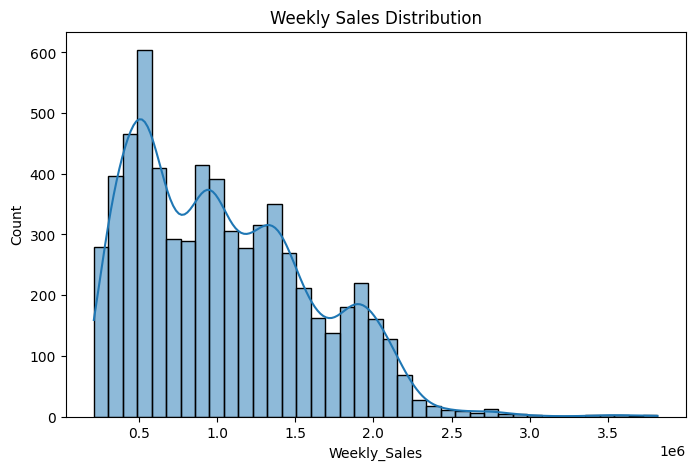

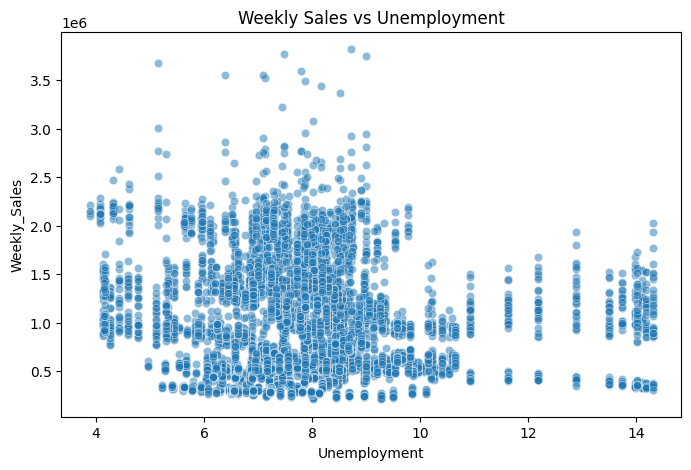

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title("Weekly Sales Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Weekly Sales vs Unemployment")
plt.show()


In [10]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Weekly_Sales'] < Q1 - 1.5 * IQR) |
              (df['Weekly_Sales'] > Q3 + 1.5 * IQR)]

print(f"Number of outliers in Weekly Sales: {len(outliers)}")


Number of outliers in Weekly Sales: 34


In [11]:
corr = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Overall correlation: {corr:.2f}")

store_avg = df.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
).reset_index(name='Sales_Unemp_Corr')

store_avg = store_avg.sort_values('Sales_Unemp_Corr')
print("\nStores most negatively affected by Unemployment:")
print(store_avg.head())



Overall correlation: -0.11

Stores most negatively affected by Unemployment:
    Store  Sales_Unemp_Corr
37     38         -0.785290
43     44         -0.780076
38     39         -0.384681
41     42         -0.356355
40     41         -0.350630


/tmp/ipython-input-3917112965.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_avg = df.groupby('Store').apply(


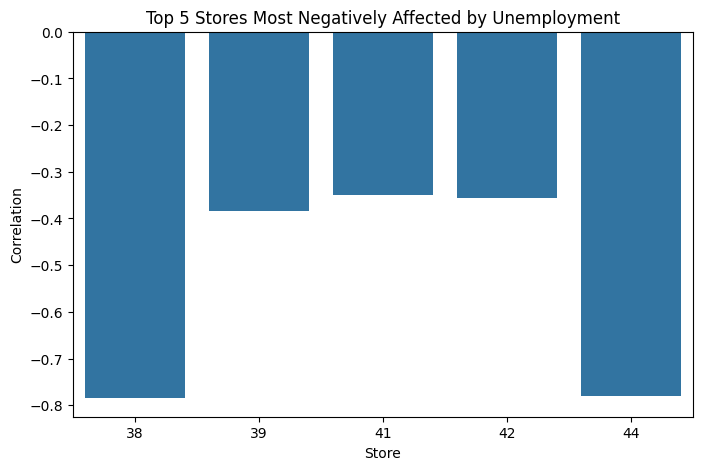

In [12]:
top_affected = store_avg.head(5)
plt.figure(figsize=(8,5))
sns.barplot(x='Store', y='Sales_Unemp_Corr', data=top_affected)
plt.title("Top 5 Stores Most Negatively Affected by Unemployment")
plt.ylabel("Correlation")
plt.show()


In [13]:

overall_corr = df['Weekly_Sales'].corr(df['Unemployment'])

if overall_corr < 0:
    print(f" higher unemployment is linked to LOWER weekly sales (corr = {overall_corr:.2f}).")
elif overall_corr > 0:
    print(f" higher unemployment is linked to HIGHER weekly sales (corr = {overall_corr:.2f}).")
else:
    print(f"No clear overall correlation between unemployment and sales (corr = {overall_corr:.2f}).")

worst_store = store_avg.iloc[0]
print(f"Store {worst_store['Store']} is most negatively affected (corr = {worst_store['Sales_Unemp_Corr']:.2f}).")


 higher unemployment is linked to LOWER weekly sales (corr = -0.11).
Store 38.0 is most negatively affected (corr = -0.79).


In [14]:
df = df.sort_values('Date')

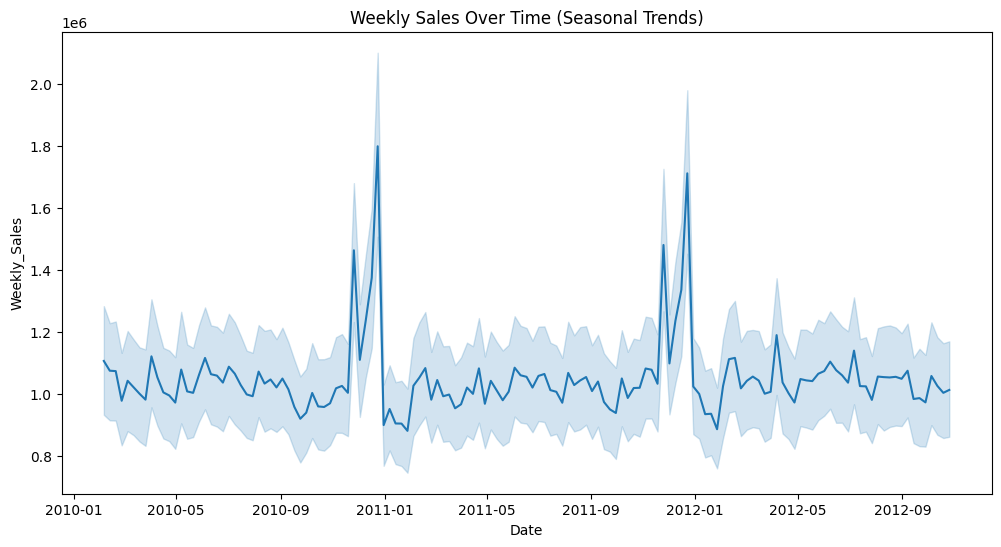

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Weekly Sales Over Time (Seasonal Trends)")
plt.show()

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


Correlation between Temperature and Weekly Sales: -0.06


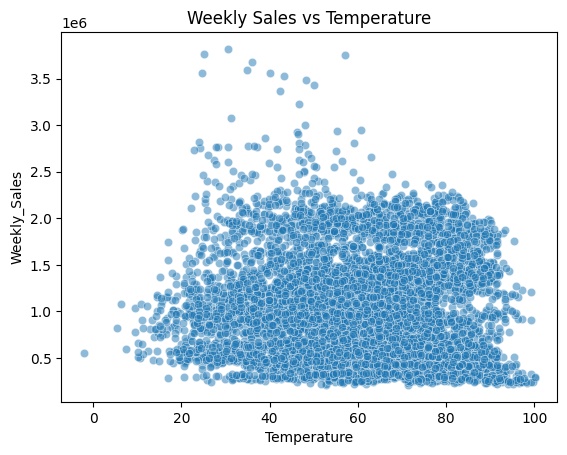

In [17]:
# Temperature vs Weekly Sales correlation
temp_corr = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Temperature and Weekly Sales: {temp_corr:.2f}")

# Visualization
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Weekly Sales vs Temperature")
plt.show()


In [18]:
cpi_corr = df['Weekly_Sales'].corr(df['CPI'])
print(f"Overall correlation (CPI vs Weekly Sales): {cpi_corr:.2f}")

cpi_store_corr = df.groupby('Store').apply(
    lambda x: x['Weekly_Sales'].corr(x['CPI'])
).reset_index(name='CPI_Sales_Corr')

cpi_store_corr = cpi_store_corr.sort_values('CPI_Sales_Corr')
print("\nStores most negatively affected by CPI:")
print(cpi_store_corr.head())

Overall correlation (CPI vs Weekly Sales): -0.07

Stores most negatively affected by CPI:
    Store  CPI_Sales_Corr
35     36       -0.915095
34     35       -0.424107
13     14       -0.419755
29     30       -0.298188
42     43       -0.285686


/tmp/ipython-input-2758276612.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cpi_store_corr = df.groupby('Store').apply(


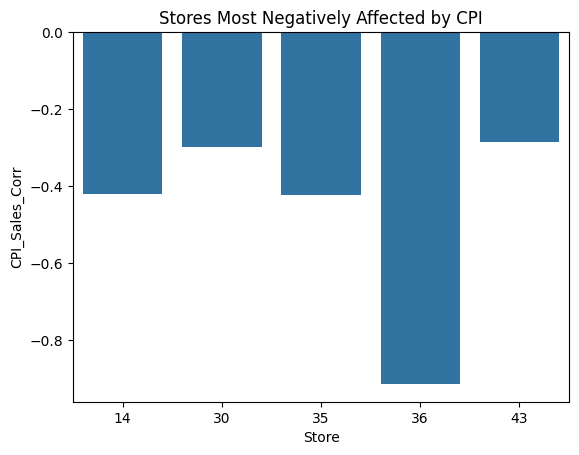

In [19]:
top_cpi_affected = cpi_store_corr.head(5)
sns.barplot(x='Store', y='CPI_Sales_Corr', data=top_cpi_affected)
plt.title("Stores Most Negatively Affected by CPI")
plt.show()

In [20]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

top_stores = store_avg_sales.sort_values('Weekly_Sales', ascending=False)

print("Top 5 Performing Stores:")
print(top_stores.head())

Top 5 Performing Stores:
    Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06


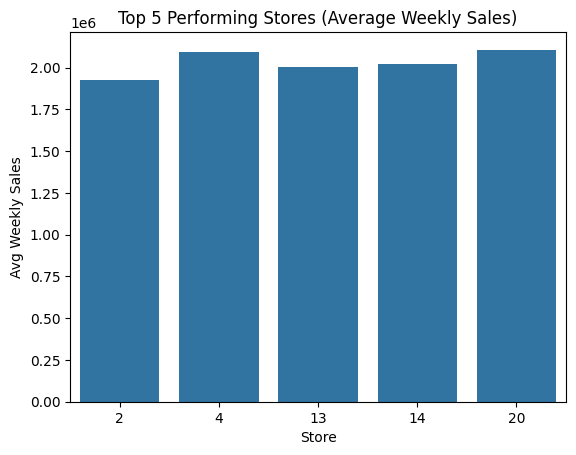

In [21]:
sns.barplot(x='Store', y='Weekly_Sales', data=top_stores.head(5))
plt.title("Top 5 Performing Stores (Average Weekly Sales)")
plt.ylabel("Avg Weekly Sales")
plt.show()


In [22]:
best_store = top_stores.iloc[0]
worst_store = top_stores.iloc[-1]

print(f"Best Store: {best_store['Store']} → Avg Weekly Sales = {best_store['Weekly_Sales']:.2f}")
print(f"Worst Store: {worst_store['Store']} → Avg Weekly Sales = {worst_store['Weekly_Sales']:.2f}")

difference = best_store['Weekly_Sales'] - worst_store['Weekly_Sales']
percent_diff = (difference / best_store['Weekly_Sales']) * 100

print(f"Difference in Sales: {difference:.2f}")
print(f"Percentage Difference: {percent_diff:.2f}%")


Best Store: 20.0 → Avg Weekly Sales = 2107676.87
Worst Store: 33.0 → Avg Weekly Sales = 259861.69
Difference in Sales: 1847815.18
Percentage Difference: 87.67%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

   Store       Date  Predicted_Weekly_Sales
0      1 2012-11-04            1.538713e+06
1      1 2012-11-11            1.556450e+06
2      1 2012-11-18            1.563433e+06
3      1 2012-11-25            1.566182e+06
4      1 2012-12-02            1.567265e+06


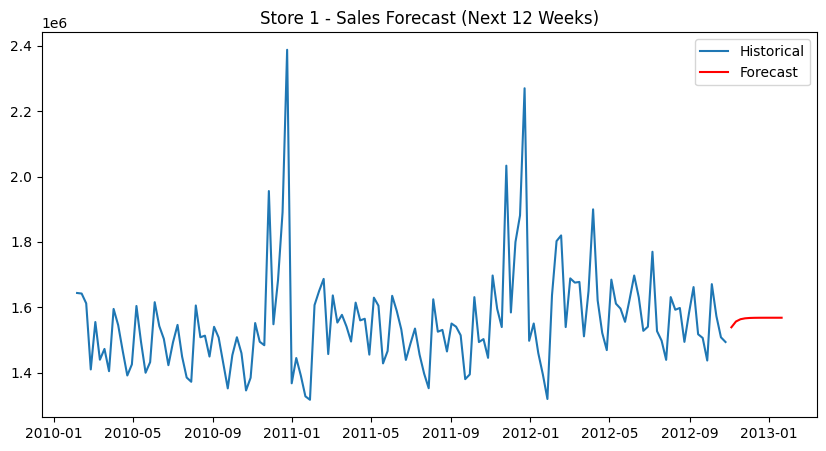

In [24]:
from statsmodels.tsa.arima.model import ARIMA

df = df.sort_values(['Store', 'Date'])

forecasts = []

for store_id in df['Store'].unique():
    store_data = df[df['Store'] == store_id].set_index('Date')['Weekly_Sales']

    try:
        model = ARIMA(store_data, order=(1,1,1))
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=12)

        for date, pred in zip(pd.date_range(store_data.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W'), forecast):
            forecasts.append({'Store': store_id, 'Date': date, 'Predicted_Weekly_Sales': pred})

    except Exception as e:
        print(f"Store {store_id}: Model failed - {e}")

# Convert to DataFrame
forecast_df = pd.DataFrame(forecasts)
print(forecast_df.head())

# Plot example for one store
sample_store = df['Store'].unique()[0]
plt.figure(figsize=(10,5))
plt.plot(df[df['Store'] == sample_store]['Date'], df[df['Store'] == sample_store]['Weekly_Sales'], label='Historical')
plt.plot(forecast_df[forecast_df['Store'] == sample_store]['Date'],
         forecast_df[forecast_df['Store'] == sample_store]['Predicted_Weekly_Sales'], label='Forecast', color='red')
plt.title(f"Store {sample_store} - Sales Forecast (Next 12 Weeks)")
plt.legend()
plt.show()


In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_time_series = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
df_time_series = df_time_series.sort_values(['Store', 'Date'])
display(df_time_series.head())

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
